In [1]:
import pandas as pd
import numpy as np

In [9]:
#Reading Dataset
df = pd.read_csv('/content/adult.csv')

In [10]:
# Showing the tope 5 obersrvation of the dataset
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [11]:
# show data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
# show data type of all the attributes
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [13]:
#show the number of attributes and observations
df.shape

(32561, 15)

In [14]:
print("Following columns contains int data values\n\n")
for col in df.columns:
  if df[col].dtype == "int64":
    print('Attribute:',col)
    print('-------------------')
    #print(df[col].value_counts(),"\n\n")
    #print('-------------------')

Following columns contains int data values


Attribute: age
-------------------
Attribute: fnlwgt
-------------------
Attribute: education.num
-------------------
Attribute: capital.gain
-------------------
Attribute: capital.loss
-------------------
Attribute: hours.per.week
-------------------


In [15]:
# convert "?" values to NaN for further processing
for col in df.columns:
  df[[col]] = df[[col]].replace('?',np.NaN)


In [16]:
#find null value for all attributes and sum total number
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [17]:
#drop all rows that has null values
df = df.dropna()

we can Apply Forward Fill mothod also to Replace 'NaN'
df.fillna(method = 'ffill', inplace = True)
df.head()

In [18]:

#Checking again
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [19]:
#assing income column to y as target value
x = df.drop(columns = 'income')
y = df['income']
y.value_counts()

<=50K    22654
>50K      7508
Name: income, dtype: int64

# Performing Undersampling For balancing Data
Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

In [20]:
# class count
income_count_0, income_count_1 = df['income'].value_counts()

# Separate class
income_0 = df[df['income'] == 0]
income_1 = df[df['income'] == 1]
# print the shape of the class
print('income 0:', income_0.shape)
print('income 1:', income_1.shape)

income 0: (0, 15)
income 1: (0, 15)


In [21]:
#Converting Categorical Values In Numerical  
y = y.replace({'<=50K': 0, '>50K': 1}) #1 Represents >50K & 0 represents <=50K
y.value_counts()

0    22654
1     7508
Name: income, dtype: int64

## Encoding features

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
df = df.apply(le.fit_transform)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,65,2,6096,11,8,6,3,1,4,0,0,89,17,38,0
3,37,2,6564,5,3,0,6,4,4,0,0,88,39,38,0
4,24,2,15770,15,9,5,9,3,4,0,0,88,39,38,0
5,17,2,13278,11,8,0,7,4,4,0,0,87,44,38,0
6,21,2,7296,0,5,5,0,4,4,1,0,87,39,38,0


In [26]:
#Observing Random 4 rows from dataset
df.sample(5, random_state=999)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
16112,20,2,18761,11,8,5,2,4,4,1,0,0,68,29,0
8998,12,2,20166,11,8,2,2,0,2,1,0,0,39,38,0
29837,18,2,13015,8,10,2,12,0,2,1,0,0,37,22,0
27802,8,2,10045,7,11,4,9,1,4,1,0,0,54,38,0
21104,21,2,12636,11,8,2,2,0,4,1,0,0,39,38,1


In [27]:
df.describe()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,21.435482,2.199324,9825.221504,10.333764,9.121312,2.580134,5.959850,1.418341,3.678602,0.675685,6.552450,2.072641,39.871527,36.382567,0.248922
std,13.125355,0.953925,5671.017927,3.812292,2.549995,1.498016,4.029566,1.601338,0.834709,0.468126,23.284819,10.028470,11.771826,6.105372,0.432396
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,2.000000,5025.250000,9.000000,8.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,39.000000,38.000000,0.000000
50%,20.000000,2.000000,9689.500000,11.000000,9.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,39.000000,38.000000,0.000000
75%,30.000000,2.000000,14520.750000,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,44.000000,38.000000,0.000000
max,71.000000,6.000000,20262.000000,15.000000,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,117.000000,89.000000,93.000000,40.000000,1.000000


# Data Split for Train-Test Purpose


In [46]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.3)

# Applying kNN

In [47]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create object of kNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(x_train, y_train)



KNeighborsClassifier(n_neighbors=3)

#Make prediction

In [48]:
#Predict the response for test dataset
y_pred = knn.predict(x_test)

#Evaluating the predictions

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy: \n", accuracy_score(y_test, y_pred)) #Accuracy
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred)) #Confusion Matrix
print("Classification Report: \n", classification_report(y_test,y_pred)) 

Accuracy: 
 0.7582053265554205
Confusion Matrix: 
 [[5923  898]
 [1290  938]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84      6821
           1       0.51      0.42      0.46      2228

    accuracy                           0.76      9049
   macro avg       0.67      0.64      0.65      9049
weighted avg       0.74      0.76      0.75      9049



In [50]:
#Checking k values in a range of 1 to 40
#Evaluating alternative K-values for better predictions
error_rate = []

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(x_train, y_train)
  pred_i = knn.predict(x_test)
  error_rate.append(np.mean(pred_i != y_test))


#Plotting Error rate


Text(0, 0.5, 'Error Rate')

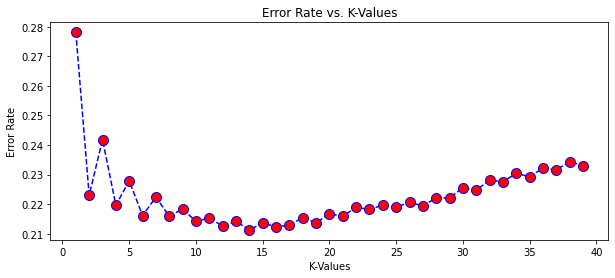

In [51]:
# Configure and plot error rate over k values
plt.figure(figsize=(10,4))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

In [53]:

knn = KNeighborsClassifier(n_neighbors=15)


knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)


print("When K Value is 15\n")
print("Accuracy: \n",accuracy_score(y_test, y_pred),"\n\n")
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred), "\n\n")
print("Classification Report: \n", classification_report(y_test,y_pred))

When K Value is 15

Accuracy: 
 0.7863852359376726 


Confusion Matrix: 
 [[6619  202]
 [1731  497]] 


Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.97      0.87      6821
           1       0.71      0.22      0.34      2228

    accuracy                           0.79      9049
   macro avg       0.75      0.60      0.61      9049
weighted avg       0.77      0.79      0.74      9049

